In [1]:
import os
import sys

import pandas as pd
import torch

In [2]:
# Add the parent directory of 'src' to sys.path if not already present
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import src.assimilation.assimilator  # noqa: E402
import src.assimilation.test_configs  # noqa: E402, F401

In [3]:
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt

mpl.rcParams["text.usetex"] = True
mpl.rc("text.latex", preamble=r"\usepackage{amsmath}")

In [4]:
SAVE_ROOT = "../ass_results/assimilate_various_obs_freq_no_back"
pickle_cache_path = "./plot_various_obs_freq_no_back.pkl"

In [5]:
# for filename in os.listdir(SAVE_ROOT):
#     if filename.endswith("transfered.pt") and ('vor2vel' not in filename):
#         file_path = os.path.join(SAVE_ROOT, filename)
#         print(file_path)
#         saved_data = torch.load(file_path, weights_only=False)
#         saved_data.pop("config")
#         print(saved_data.keys())
#         torch.save(saved_data, file_path[:-13] + "clipped.pt")


In [ ]:
read_cache = 1

try:
    assert read_cache
    results = pd.read_pickle(pickle_cache_path)
except:  # noqa: E722
    entries = []
    cnt = 0
    for filename in os.listdir(SAVE_ROOT):
        if filename.endswith(".pt"):
            file_path = os.path.join(SAVE_ROOT, filename)
            print(cnt, file_path)
            saved_data = torch.load(file_path, weights_only=False)
            if "seed_no" in saved_data:
                saved_data["seedno"] = saved_data["seed_no"]
            entry = pd.DataFrame(
                {
                    "obs_type": saved_data["obs_type"][0],
                    "method": saved_data["method"],
                    "rand_mask_ratio": saved_data["rand_mask_ratio"],
                    "seed_no": saved_data["seedno"],
                    "rmse": saved_data["rmse"],
                    "step_idx": range(len(saved_data["rmse"])),
                    "time_stride": saved_data["time_stride"],
                    "avg_rmse": sum(saved_data["rmse"]) / len(saved_data["rmse"]),
                }
            )
            entries.append(entry)
            cnt += 1
    results = pd.concat(entries)
    results.to_pickle(pickle_cache_path)

0 ../ass_results/assimilate_various_obs_freq_no_back/['vor2vel']_soad_seedno0_1.0_1.pt
1 ../ass_results/assimilate_various_obs_freq_no_back/['vor2vel']_soad_seedno0_1.0_2.pt
2 ../ass_results/assimilate_various_obs_freq_no_back/['vor2vel']_soad_seedno0_1.0_4.pt
3 ../ass_results/assimilate_various_obs_freq_no_back/['vor2vel']_soad_seedno0_1.0_8.pt
4 ../ass_results/assimilate_various_obs_freq_no_back/['vor2vel']_soad_seedno1_1.0_1.pt
5 ../ass_results/assimilate_various_obs_freq_no_back/['vor2vel']_soad_seedno1_1.0_2.pt
6 ../ass_results/assimilate_various_obs_freq_no_back/['vor2vel']_soad_seedno1_1.0_4.pt
7 ../ass_results/assimilate_various_obs_freq_no_back/['vor2vel']_soad_seedno1_1.0_8.pt
8 ../ass_results/assimilate_various_obs_freq_no_back/['vor2vel']_soad_seedno2_1.0_1.pt
9 ../ass_results/assimilate_various_obs_freq_no_back/['vor2vel']_soad_seedno2_1.0_2.pt
10 ../ass_results/assimilate_various_obs_freq_no_back/['vor2vel']_soad_seedno2_1.0_4.pt
11 ../ass_results/assimilate_various_obs_f

In [7]:
results  # 7sparsity x 4time_stride x 5seedno x 9time_steps

,obs_type,method,rand_mask_ratio,seed_no,rmse,step_idx,time_stride,avg_rmse
0,vor2vel,soad,1.0,0,0.136543,0,1,0.118837
1,vor2vel,soad,1.0,0,0.127177,1,1,0.118837
2,vor2vel,soad,1.0,0,0.120310,2,1,0.118837
3,vor2vel,soad,1.0,0,0.116345,3,1,0.118837
4,vor2vel,soad,1.0,0,0.113551,4,1,0.118837
...,...,...,...,...,...,...,...,...
4,sin3x,soad,10.0,4,1.513768,4,8,1.512859
5,sin3x,soad,10.0,4,1.515867,5,8,1.512859
6,sin3x,soad,10.0,4,1.517239,6,8,1.512859
7,sin3x,soad,10.0,4,1.518169,7,8,1.512859


In [8]:
results["method"] = results["method"].replace({"maa": "soad"})

In [9]:
count_keys = ["obs_type", "method", "rand_mask_ratio", "time_stride", "seed_no"]
for key in count_keys:
    print(key, ":", sorted(results[key].unique()))

obs_type : ['arctan3x', 'sin3x', 'vor2vel']
method : ['soad']
rand_mask_ratio : [np.float64(0.01), np.float64(0.0625), np.float64(0.25), np.float64(1.0), np.float64(2.0), np.float64(4.0), np.float64(10.0)]
time_stride : [np.int64(1), np.int64(2), np.int64(4), np.int64(8)]
seed_no : [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [10]:
df = results

In [11]:
arctan3x = df[df["obs_type"] == "arctan3x"]
sin3x = df[df["obs_type"] == "sin3x"]
vor2vel = df[df["obs_type"] == "vor2vel"]

In [12]:
# arctan3x_sda = arctan3x[arctan3x["method"] == "sda"]
arctan3x_soad = arctan3x[arctan3x["method"] == "soad"]

# sin3x_sda = sin3x[sin3x["method"] == "sda"]
sin3x_soad = sin3x[sin3x["method"] == "soad"]

# vor2vel_sda = vor2vel[vor2vel["method"] == "sda"]
vor2vel_soad = vor2vel[vor2vel["method"] == "soad"]

In [13]:
palette = ["#420802", "#822E24", "#C27067", "#FFCDC7"]
palette = ["#42040B", "#822833", "#C26D76", "#FFCFD4"]
palette = ["#2A3332", "#37615C", "#33A194", "#0FE0C8"]
palette = ["#0D3320", "#306149", "#78A18D", "#B4E0CA"]
palette = ["#072433", "#244D61", "#648CA1", "#D1DBE0"]
palette = ["#060933", "#242861", "#6468A1", "#D1D2E0"]
palette = ["#7B7AD6", "#E08D89", "#E0D189", "#89E1AB"]
# palette = ['#8CB1FF', '#FF82B9', '#FFDC8C', '#8DFF91']
palette = sns.palettes.color_palette(palette)

In [14]:
def step_wise_plot(df, ratio_label: str, save_path: str | None = None, ylim: tuple[float, float] | None = None):
    n_mask_params = len(df["rand_mask_ratio"].unique()) + 1
    ax = sns.lineplot(
        df,
        x="step_idx",
        y="rmse",
        hue="time_stride",
        style="rand_mask_ratio",
        errorbar="sd",
        palette=palette,
        style_order=df["rand_mask_ratio"].unique().tolist(),
    )

    handles, labels = ax.get_legend_handles_labels()

    ratio_handles = [handles[-n_mask_params]]
    ratio_labels = [labels[-n_mask_params]]

    idxs = [1, 2, 3, 4]
    for idx in idxs:
        ratio_handles.append(handles[-n_mask_params + idx])
        ratio_labels.append(labels[-n_mask_params + idx])

    ratio_hl = [ratio_handles, ratio_labels]

    # ratio_hl = [handles[-n_mask_params:], labels[-n_mask_params:]]
    stride_hl = [handles[:-n_mask_params], labels[:-n_mask_params]]

    ratio_hl[1][0] = ratio_label
    stride_hl[1][0] = "$N$"
    for k, s in enumerate(ratio_hl[1]):
        if s.endswith(".0"):
            ratio_hl[1][k] = s[:-2]

    hls = [ratio_hl[0] + stride_hl[0], ratio_hl[1] + stride_hl[1]]
    leg = ax.legend(*hls, loc="upper left", borderaxespad=0.0, ncols=2)
    ax.add_artist(leg)

    plt.xlabel("time step")
    plt.ylabel("RMSE")

    if ylim is not None:
        plt.ylim(ylim)

    if save_path is not None:
        plt.savefig(save_path)

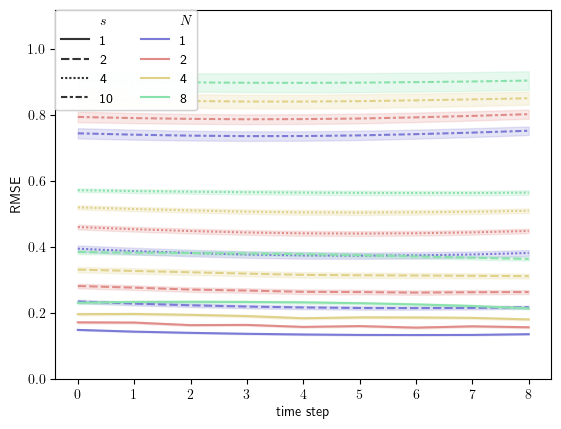

In [15]:
to_plot = arctan3x_soad[arctan3x_soad["rand_mask_ratio"] > 0.99]
to_plot = to_plot.sort_values(by="rand_mask_ratio", ascending=True)

step_wise_plot(to_plot, "$s$", "../figs/assimilate_without_prior_arctan3x_soad_s.pdf", ylim=(0.0, 1.12))

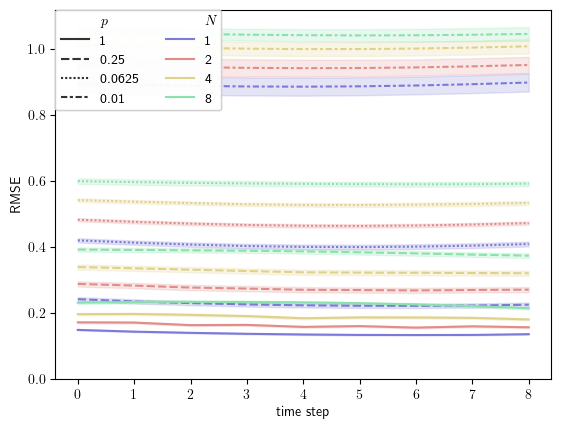

In [16]:
to_plot = arctan3x_soad[arctan3x_soad["rand_mask_ratio"] < 1.01]
to_plot = to_plot.sort_values(by="rand_mask_ratio", ascending=False)

step_wise_plot(to_plot, "$p$", "../figs/assimilate_without_prior_arctan3x_soad_p.pdf", ylim=(0.0, 1.12))

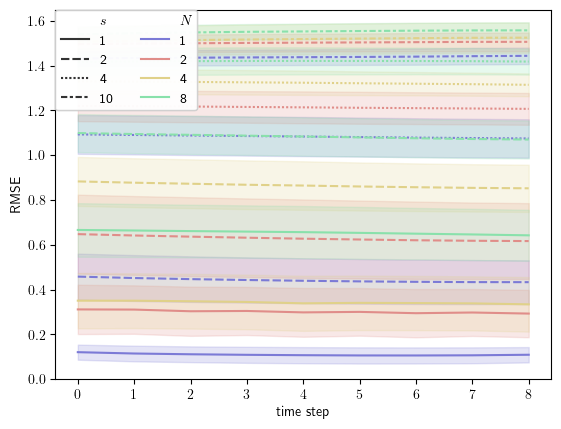

In [17]:
to_plot = sin3x_soad[sin3x_soad["rand_mask_ratio"] > 0.99]
to_plot = to_plot.sort_values(by="rand_mask_ratio", ascending=True)

step_wise_plot(to_plot, "$s$", "../figs/assimilate_without_prior_sin3x_soad_s.pdf", ylim=(0.0, 1.65))

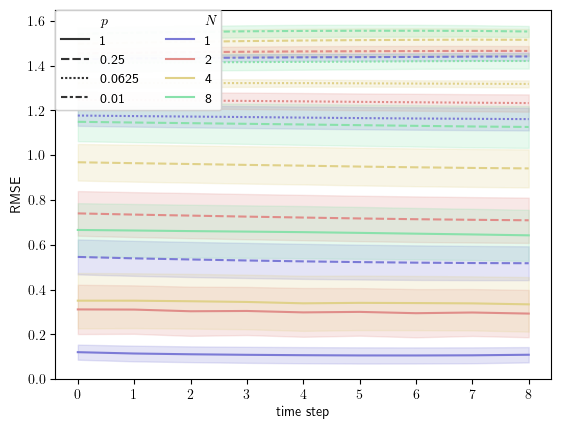

In [18]:
to_plot = sin3x_soad[sin3x_soad["rand_mask_ratio"] < 1.01]
to_plot = to_plot.sort_values(by="rand_mask_ratio", ascending=False)

step_wise_plot(to_plot, "$p$", "../figs/assimilate_without_prior_sin3x_soad_p.pdf", ylim=(0.0, 1.65))

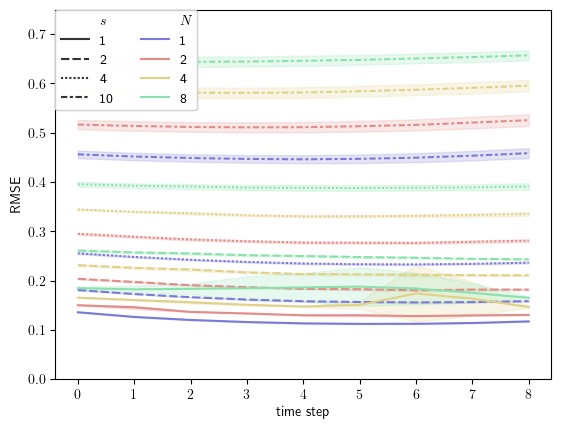

In [19]:
to_plot = vor2vel_soad[vor2vel_soad["rand_mask_ratio"] > 0.99]
to_plot = to_plot.sort_values(by="rand_mask_ratio", ascending=True)

step_wise_plot(to_plot, "$s$", "../figs/assimilate_without_prior_vor2vel_soad_s.pdf", ylim=(0.0, 0.75))

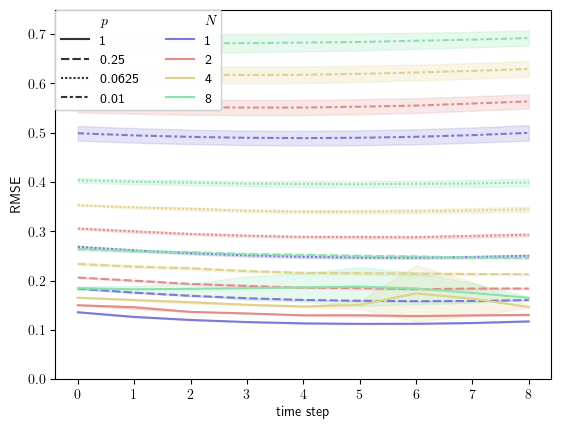

In [20]:
to_plot = vor2vel_soad[vor2vel_soad["rand_mask_ratio"] < 1.01]
to_plot = to_plot.sort_values(by="rand_mask_ratio", ascending=False)

step_wise_plot(to_plot, "$p$", "../figs/assimilate_without_prior_vor2vel_soad_p.pdf", ylim=(0.0, 0.75))

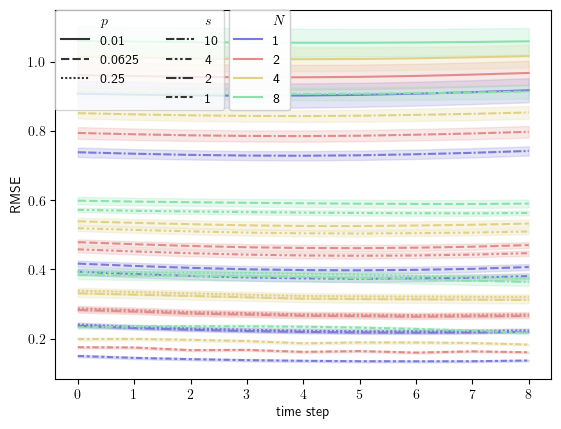

In [14]:
to_plot = arctan3x_soad
n_mask_params = len(to_plot["rand_mask_ratio"].unique()) + 1
ax = sns.lineplot(
    to_plot, x="step_idx", y="rmse", hue="time_stride", style="rand_mask_ratio", errorbar="sd", palette=palette
)

handles, labels = ax.get_legend_handles_labels()

ratio_handles = [handles[-n_mask_params]]
ratio_labels = [labels[-n_mask_params]]
# 1st column
idxs = [1, 2, 3]
for idx in idxs:
    ratio_handles.append(handles[-n_mask_params + idx])
    ratio_labels.append(labels[-n_mask_params + idx])

# 2nd column
ratio_handles.append(handles[-n_mask_params])  # empty style
ratio_labels.append("")  # empty string
ratio_handles.append(handles[-n_mask_params])  # empty style
ratio_labels.append("")  # empty string
idxs = [7, 6, 5, 4]
for idx in idxs:
    ratio_handles.append(handles[-n_mask_params + idx])
    ratio_labels.append(labels[-n_mask_params + idx])
ratio_hl = [ratio_handles, ratio_labels]

# ratio_hl = [handles[-n_mask_params:], labels[-n_mask_params:]]
stride_hl = [handles[:-n_mask_params], labels[:-n_mask_params]]

ratio_hl[1][0] = "$p$"
ratio_hl[1][5] = "$s$"
stride_hl[1][0] = "$N$"
for k, s in enumerate(ratio_hl[1]):
    if s.endswith(".0"):
        ratio_hl[1][k] = s[:-2]

ratio_leg = ax.legend(*ratio_hl, loc="upper left", borderaxespad=0.0, ncols=2)
stride_leg = ax.legend(*stride_hl, loc="upper left", bbox_to_anchor=(0.35, 1.0), borderaxespad=0.0)

ax.add_artist(ratio_leg)
ax.add_artist(stride_leg)

plt.xlabel("time step")
plt.ylabel("RMSE")

plt.savefig("../figs/assimilate_without_prior_arctan3x_soad.pdf")
# plt.ylim(.1, .5)
# plt.yscale('log')

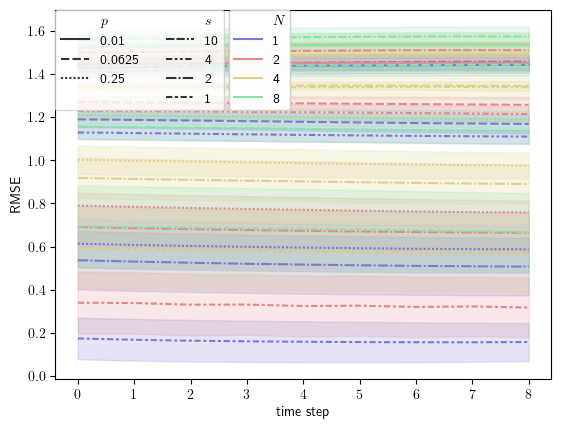

In [15]:
to_plot = sin3x_soad
n_mask_params = len(to_plot["rand_mask_ratio"].unique()) + 1
ax = sns.lineplot(
    to_plot, x="step_idx", y="rmse", hue="time_stride", style="rand_mask_ratio", errorbar="sd", palette=palette
)

handles, labels = ax.get_legend_handles_labels()

ratio_handles = [handles[-n_mask_params]]
ratio_labels = [labels[-n_mask_params]]
# 1st column
idxs = [1, 2, 3]
for idx in idxs:
    ratio_handles.append(handles[-n_mask_params + idx])
    ratio_labels.append(labels[-n_mask_params + idx])

# 2nd column
ratio_handles.append(handles[-n_mask_params])  # empty style
ratio_labels.append("")  # empty string
ratio_handles.append(handles[-n_mask_params])  # empty style
ratio_labels.append("")  # empty string
idxs = [7, 6, 5, 4]
for idx in idxs:
    ratio_handles.append(handles[-n_mask_params + idx])
    ratio_labels.append(labels[-n_mask_params + idx])
ratio_hl = [ratio_handles, ratio_labels]

# ratio_hl = [handles[-n_mask_params:], labels[-n_mask_params:]]
stride_hl = [handles[:-n_mask_params], labels[:-n_mask_params]]

ratio_hl[1][0] = "$p$"
ratio_hl[1][5] = "$s$"
stride_hl[1][0] = "$N$"
for k, s in enumerate(ratio_hl[1]):
    if s.endswith(".0"):
        ratio_hl[1][k] = s[:-2]

ratio_leg = ax.legend(*ratio_hl, loc="upper left", borderaxespad=0.0, ncols=2)
stride_leg = ax.legend(*stride_hl, loc="upper left", bbox_to_anchor=(0.35, 1.0), borderaxespad=0.0)

ax.add_artist(ratio_leg)
ax.add_artist(stride_leg)

plt.xlabel("time step")
plt.ylabel("RMSE")

plt.savefig("../figs/assimilate_without_prior_sin3x_soad.pdf")
# plt.ylim(.1, .5)
# plt.yscale('log')

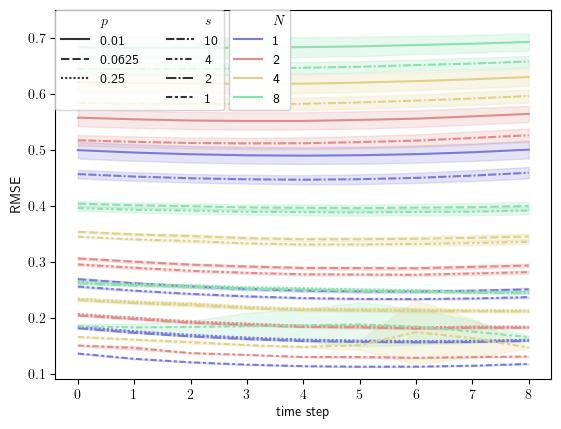

In [21]:
to_plot = vor2vel_soad
n_mask_params = len(to_plot["rand_mask_ratio"].unique()) + 1
ax = sns.lineplot(
    to_plot, x="step_idx", y="rmse", hue="time_stride", style="rand_mask_ratio", errorbar="sd", palette=palette
)

handles, labels = ax.get_legend_handles_labels()

ratio_handles = [handles[-n_mask_params]]
ratio_labels = [labels[-n_mask_params]]
# 1st column
idxs = [1, 2, 3]
for idx in idxs:
    ratio_handles.append(handles[-n_mask_params + idx])
    ratio_labels.append(labels[-n_mask_params + idx])

# 2nd column
ratio_handles.append(handles[-n_mask_params])  # empty style
ratio_labels.append("")  # empty string
ratio_handles.append(handles[-n_mask_params])  # empty style
ratio_labels.append("")  # empty string
idxs = [7, 6, 5, 4]
for idx in idxs:
    ratio_handles.append(handles[-n_mask_params + idx])
    ratio_labels.append(labels[-n_mask_params + idx])
ratio_hl = [ratio_handles, ratio_labels]

# ratio_hl = [handles[-n_mask_params:], labels[-n_mask_params:]]
stride_hl = [handles[:-n_mask_params], labels[:-n_mask_params]]

ratio_hl[1][0] = "$p$"
ratio_hl[1][5] = "$s$"
stride_hl[1][0] = "$N$"
for k, s in enumerate(ratio_hl[1]):
    if s.endswith(".0"):
        ratio_hl[1][k] = s[:-2]

ratio_leg = ax.legend(*ratio_hl, loc="upper left", borderaxespad=0.0, ncols=2)
stride_leg = ax.legend(*stride_hl, loc="upper left", bbox_to_anchor=(0.35, 1.0), borderaxespad=0.0)

ax.add_artist(ratio_leg)
ax.add_artist(stride_leg)

plt.xlabel("time step")
plt.ylabel("RMSE")

plt.ylim(0.09, 0.75)
plt.savefig("../figs/assimilate_without_prior_vor2vel_soad.pdf")
# plt.yscale('log')

In [22]:
grouped = arctan3x.groupby(["rand_mask_ratio", "step_idx", "time_stride"])
f = grouped.agg({"rmse": ["mean", "std"]})
f

rmse          
                                          mean       std
rand_mask_ratio step_idx time_stride                    
0.01            0        1            0.896189  0.027092
                         2            0.952765  0.025791
                         4            1.010957  0.019315
                         8            1.051599  0.015567
                1        1            0.892163  0.027294
...                                        ...       ...
10.00           7        8            0.901935  0.028368
                8        1            0.752638  0.012975
                         2            0.802901  0.013958
                         4            0.851106  0.019757
                         8            0.904775  0.028207

[252 rows x 2 columns]

In [23]:
def plot_avg_cases(x: pd.DataFrame, save_path: str):
    grouped = x.groupby(["rand_mask_ratio", "step_idx", "time_stride"])
    f = grouped.agg({"rmse": ["mean", "std"]})
    ff = f.groupby(["rand_mask_ratio", "time_stride"]).mean()
    ff = ff.reset_index()
    df_pivot = ff.pivot_table(index="rand_mask_ratio", columns="time_stride", values="rmse").drop(columns="std")
    print(df_pivot)

    vmin, vmax = (0.05, 0.5)  # if 'arctan' in save_path else (0., 1.)

    # annot_data = np.asarray(df_pivot.values)
    # annot_str = np.empty(annot_data.shape, dtype=str)
    # for ii in range(annot_data.shape[0]):
    #     for jj in range(annot_data.shape[1]):
    #         annot_str[ii, jj] = ">1" if annot_data[ii, jj] > 1 else f"{annot_data[ii, jj]:.3f}"

    cmap = sns.color_palette("Blues", as_cmap=True)
    cmap.set_over("slategray")

    ax = sns.heatmap(
        df_pivot,
        annot=True,
        annot_kws={"size": 12},
        fmt=".3f",
        linewidths=0.5,
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        cbar_kws={"extend": "max", "label": "RMSE"},
    )
    ax.set_yticklabels(["$p=0.01$", "$p=0.0625$", "$p=0.25$", "$s=p=1$", "$s=2$", "$s=4$", "$s=10$"], rotation=0)
    ax.set_xticklabels(["$N=1$", "$N=2$", "$N=4$", "$N=8$"], rotation=45)
    ax.set_ylabel("")
    ax.set_xlabel("")
    plt.savefig(save_path)

/tmp/ipykernel_949222/2214515682.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_pivot = ff.pivot_table(index="rand_mask_ratio", columns="time_stride", values="rmse").drop(columns="std")


                     mean                              
time_stride             1         2         4         8
rand_mask_ratio                                        
0.0100           0.891083  0.946651  1.004300  1.045067
0.0625           0.406766  0.470392  0.532436  0.593355
0.2500           0.227868  0.274928  0.327344  0.385252
1.0000           0.138192  0.162620  0.189442  0.228719
2.0000           0.221063  0.268540  0.319189  0.376615
4.0000           0.380771  0.447425  0.509713  0.566562
10.0000          0.741878  0.792559  0.844910  0.900643


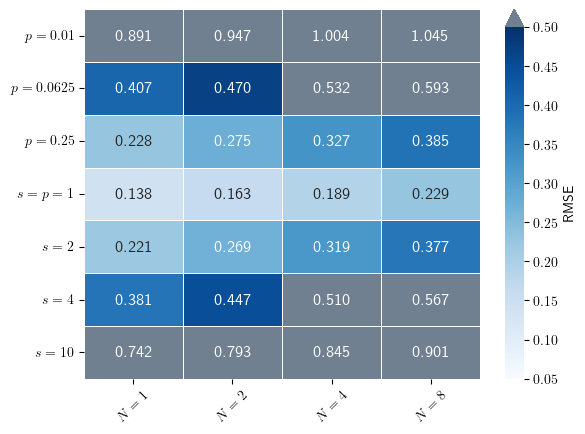

In [24]:
plot_avg_cases(arctan3x_soad, save_path="../figs/assimilate_without_prior_arctan3x_soad_heatmap.pdf")

/tmp/ipykernel_949222/2214515682.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_pivot = ff.pivot_table(index="rand_mask_ratio", columns="time_stride", values="rmse").drop(columns="std")


                     mean                              
time_stride             1         2         4         8
rand_mask_ratio                                        
0.0100           1.435761  1.461490  1.509295  1.551277
0.0625           1.168031  1.239858  1.320488  1.416131
0.2500           0.528015  0.722511  0.953308  1.136829
1.0000           0.109707  0.301251  0.342559  0.654994
2.0000           0.441513  0.628871  0.865100  1.083243
4.0000           1.083046  1.213282  1.322507  1.419135
10.0000          1.437322  1.501644  1.517330  1.550832


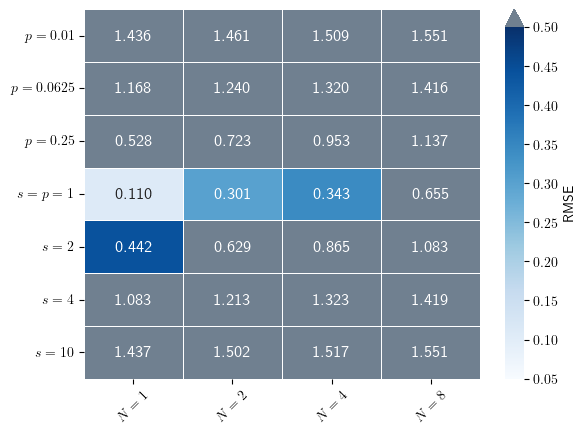

In [25]:
plot_avg_cases(sin3x_soad, save_path="../figs/assimilate_without_prior_sin3x_soad_heatmap.pdf")

/tmp/ipykernel_949222/2214515682.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_pivot = ff.pivot_table(index="rand_mask_ratio", columns="time_stride", values="rmse").drop(columns="std")


                     mean                              
time_stride             1         2         4         8
rand_mask_ratio                                        
0.0100           0.493352  0.555060  0.620891  0.684732
0.0625           0.252846  0.293184  0.343963  0.398104
0.2500           0.165469  0.189814  0.219620  0.253116
1.0000           0.118490  0.134671  0.157100  0.181338
2.0000           0.162884  0.187436  0.217200  0.250610
4.0000           0.239377  0.281844  0.334773  0.390162
10.0000          0.450868  0.515465  0.585169  0.647894


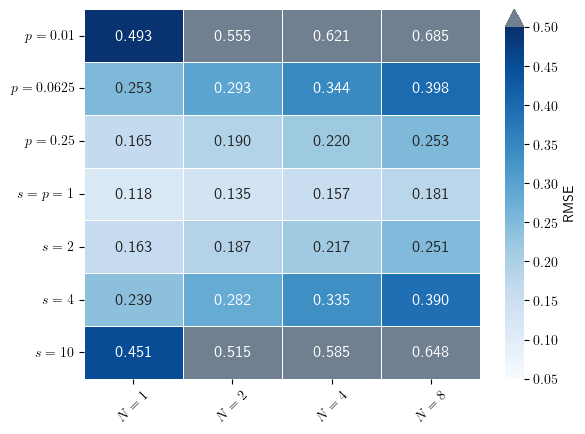

In [26]:
plot_avg_cases(vor2vel_soad, save_path="../figs/assimilate_without_prior_vor2vel_soad_heatmap.pdf")